In [2]:
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
from matplotlib.ticker import FormatStrFormatter
#if needed: ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
%matplotlib inline 

In [3]:
# color dict (use: colors['XColor'])
import ast
with open('color_palette.txt', 'r') as file:
    contents = file.read()
    colors = ast.literal_eval(contents)

In [4]:
# uncertainty for both MLL and Scikit are now sqrt(counts), but implemented differently (std dev versus rand err method in scikit)
# nuc and act trainsets use flat 1% unc/rand err
# 100% of the train set is tested (implemented differently: cv=5 for scikit and LOOV for MLL)

In [4]:
rdrive = '/mnt/researchdrive/BOX_INTERNAL/opotowsky/'
results_dir = rdrive + 'processed_results/'

In [6]:
dets = ['nuc29', 'act32', 'act7/12', 'd1_hpge', 'd2_hpge', 'd3_czt', 'd6_sri2', 'd5_labr3', 'd4_nai']
Dets = ['Nuc29', 'Act32', 'Act7/12', 'L/HPGe', 'P/HPGe', 'CZT', 'SrI2', 'LaBr3', 'NaI']
dets = ['d1_hpge', 'd2_hpge', 'd3_czt', 'd6_sri2', 'd5_labr3', 'd4_nai']
Dets = ['L/HPGe', 'P/HPGe', 'CZT', 'SrI2', 'LaBr3', 'NaI']
pred = ['enrichment',]#['burnup', 'enrichment', 'cooling']
ens = ['auto', 'short', 'long']
en_lbl = ['Auto Energy Windows List', 'Short Energy Windows List', 'Long Energy Windows List']
algcol = ['knn', 'dtree', 'mll']
alg_lbl = ['kNN', 'Decision Trees', 'MLL Calcs']
c = [colors['MBrwn'], colors['MTeal'], colors['MPurp']]

# Box plots

In [14]:
def box_plot(pred, enlist, rel_or_abs, title):
    plt.clf()
    
    df = pd.read_pickle(results_dir + rel_or_abs + 'err/' + pred + '_' + rel_or_abs + 'err_mll_scikit_compare_' + enlist  + '.pkl')
    
    fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(18,6))
    sv_base = 'plots/' + rel_or_abs + 'error_boxplots_' + enlist
    #sv_base = 'plots/' + rel_or_abs + 'error_boxplots_outliers_' + enlist
    if rel_or_abs == 'abs':
        err = 'Absolute Error'
    else:
        err = 'Relative Error %'
    if pred == 'burnup':
        pmin = [1000]
        yaxlbl = err + ' [MWd/MTU]'
        sv_fig = sv_base + '_burn.png'
    elif pred == 'enrichment':
        pmin = [0.17]
        yaxlbl = err + ' [% $^{235}$U]'
        sv_fig = sv_base + '_enri.png'
    else:
        pmin = [120, 550]
        yaxlbl = err + ' [days]'
        sv_fig = sv_base + '_cool.png'
    axs[0].set_ylabel(yaxlbl, fontsize=20, labelpad=15)
    axs[1].set_xlabel('Detector Type', fontsize=20, labelpad=15)
    #fig.suptitle(title, fontsize=22)
    #fig.subplots_adjust(top=.85)
    
    for i, ax in enumerate(axs):
        data = []
        for d in dets:
            data.append(df.loc[:, (d, algcol[i]+'_'+enlist)])
        medianprops = dict(linestyle='-.', linewidth=4, color='w')
        meanpointprops = dict(markersize=10, markeredgecolor='k', markerfacecolor='k')
        bplot = ax.boxplot(data, notch=True, labels=dets, patch_artist=True, showmeans=True, 
                           meanprops=meanpointprops, medianprops=medianprops, showfliers=False)
        ax.set_title(alg_lbl[i], fontsize=20)
        ax.tick_params(labelsize=14, labelrotation=45)
        ax.set_xticks(np.arange(len(Dets))+1)
        ax.set_xticklabels(Dets)
        ax.yaxis.grid(True)    
        for patch in bplot['boxes']:
            patch.set_facecolor(c[i])
            patch.set_alpha(0.85)
        hcolor = ['tab:red', 'tab:gray']
        for w, p in enumerate(pmin):
            ax.axhline(y=p, color=hcolor[w], linestyle='-', linewidth=3)
        
        #get info about boxplots
        #flies = []
        #for j, d in enumerate(dets):
        #    fly = bplot["fliers"][j].get_data()[1]
        #    flies.append(len(fly))
        #print('{} avg outliers: {}'.format(alg_lbl[i], np.mean(flies)))
    
    plt.subplots_adjust(wspace=0.05)
    
    return fig, ax, sv_fig

<Figure size 432x288 with 0 Axes>

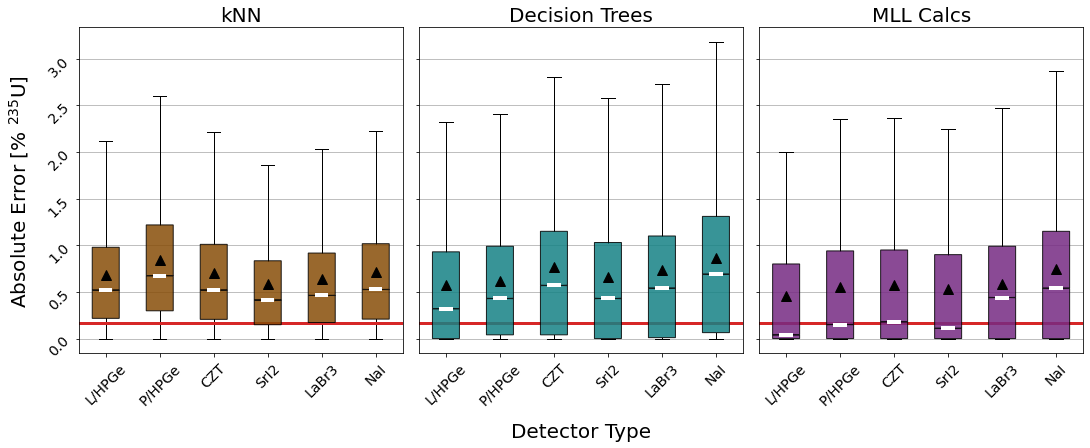

<Figure size 432x288 with 0 Axes>

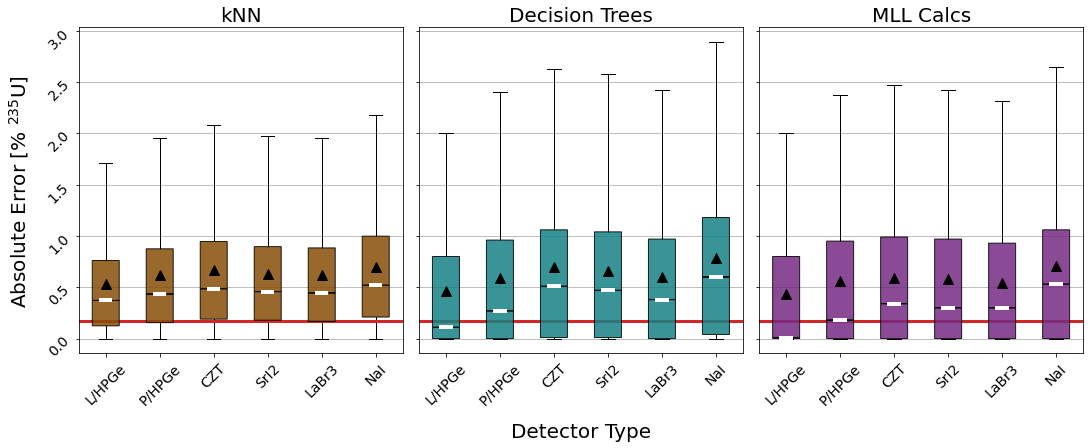

<Figure size 432x288 with 0 Axes>

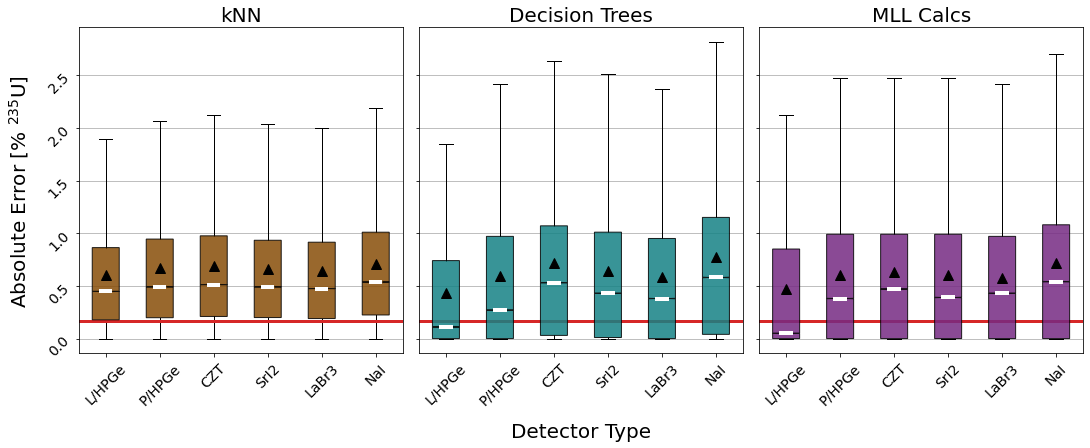

In [15]:
for p in pred:
    for en in ens:
        fig, ax, sv_fig = box_plot(p, en, 'abs', p + ', ' + en)
        plt.show()
        fig.savefig(sv_fig, bbox_inches='tight', transparent=True)

In [31]:
pred = 'burnup'
enlist = 'auto'
df = pd.read_pickle(results_dir + 'abserr/' + pred + '_abserr_mll_scikit_compare_' + enlist  + '.pkl')

<Figure size 432x288 with 0 Axes>

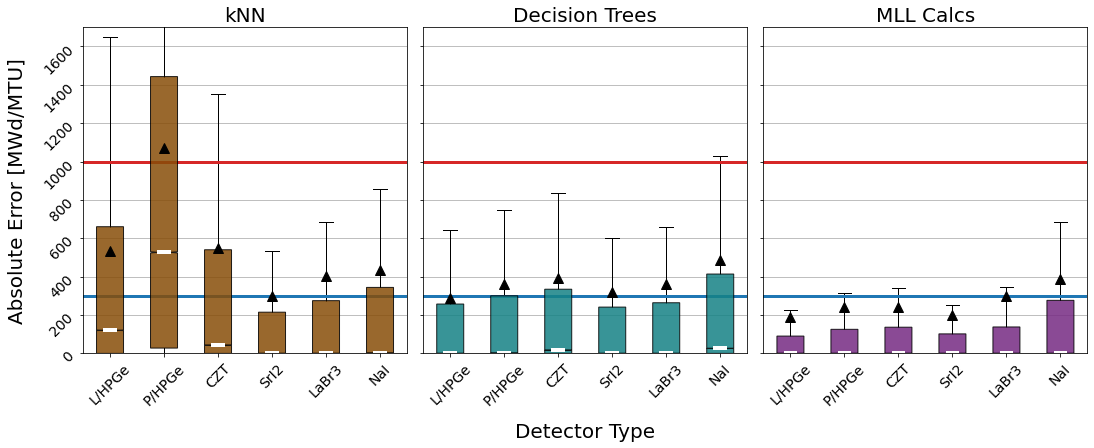

In [32]:
fig, ax, sv_fig = box_plot('burnup', 'auto', 'abs', '')
ax.set_ylim(0,1700)
plt.show()
#knn whisker cutoff extends to ~3500
#fig.savefig(sv_fig, bbox_inches='tight', transparent=True)

In [ ]:
for p in pred:
    for en in ens:
        fig, ax, sv_fig = box_plot(p, en, 'rel', p + ', ' + en)
        plt.show()

# Violin plots

In [71]:
def violin_plot(pred, enlist, rel_or_abs, title):
    plt.clf()
    
    #df = pd.read_pickle(results_dir + rel_or_abs + 'err/' + pred + '_' + rel_or_abs + 'err_mll_scikit_compare_' + enlist  + '.pkl')
    
    fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(18,6))
    sv_base = 'plots/' + rel_or_abs + 'error_boxplots_' + enlist
    if rel_or_abs == 'abs':
        err = 'Absolute Error'
    else:
        err = 'Relative Error %'
    if pred == 'burnup':
        yaxlbl = err + ' [MWd/MTU]'
        sv_fig = sv_base + '_burn.png'
    elif pred == 'enrichment':
        yaxlbl = err + ' [% U235]'
        sv_fig = sv_base + '_enri.png'
    else:
        yaxlbl = err + ' [days]'
        sv_fig = sv_base + '_cool.png'
    axs[0].set_ylabel(yaxlbl, fontsize=20, labelpad=15)
    axs[1].set_xlabel('Detector Type', fontsize=20, labelpad=15)
    fig.suptitle(title, fontsize=22)
    fig.subplots_adjust(top=.85)
    
    #medianprops = dict(linestyle='-.', linewidth=2.5, color='w')
    #meanpointprops = dict(markeredgecolor='w', markerfacecolor='cornsilk')
    for i, ax in enumerate(axs):
        data = []
        for d in dets:
            data.append(df.loc[:, (d, algcol[i]+'_'+enlist)])
        vplot = ax.violinplot(data, #positions=dets, #quantiles=[0.25, 0.75], 
                              showmeans=True, showmedians=True)
        ax.set_title(alg_lbl[i], fontsize=20)
        ax.tick_params(labelsize=14, labelrotation=45)
        ax.set_xticks(np.arange(len(Dets))+1)
        ax.set_xticklabels(Dets)
        ax.yaxis.grid(True)    
        #for patch in vplot['bodies']:
        #    patch.set_facecolor(c[i])
    
    plt.subplots_adjust(wspace=0.05)
    
    return fig, ax, sv_fig

<Figure size 432x288 with 0 Axes>

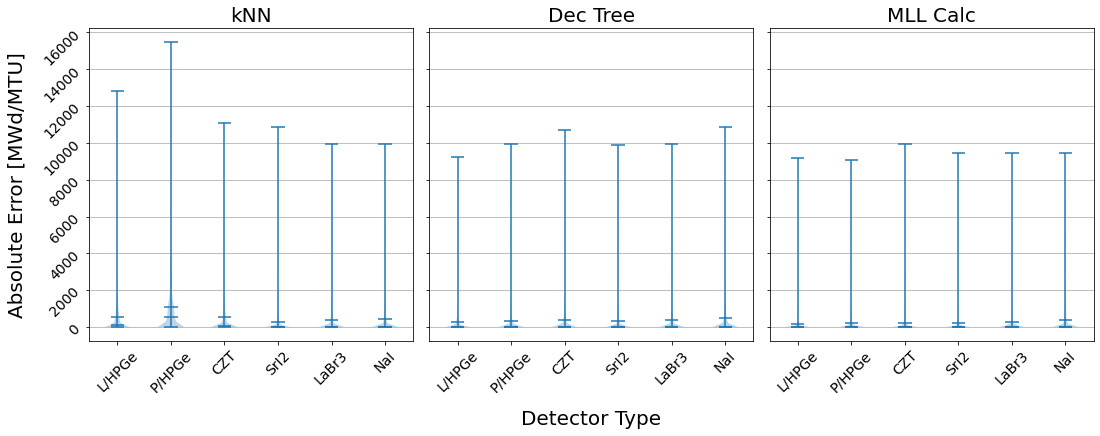

In [72]:
fig, ax, sv_fig = violin_plot('burnup', 'auto', 'abs', '')
#ax.set_ylim(0,1500)
plt.show()
#fig.savefig(sv_fig, bbox_inches='tight', transparent=True)

# Box plots for single data point (d2, auto)

In [6]:
pred = 'burnup'

In [9]:
rdrive = '/mnt/researchdrive/BOX_INTERNAL/opotowsky/'
mll_gam = rdrive + 'mll/gam_spec/'
learn_gam = rdrive + 'scikit/gam_spec/cv_pred/cv5/auto/'
csv_end = '_tset1.0_d2_hpge_predictions.csv'
job = 'Job2_unc0.0'
errname = 'AbsError'
knncsv = pred + '_knn' + csv_end
dtrcsv = pred + '_dtree' + csv_end
knn = pd.read_csv(learn_gam + knncsv).drop(columns='Unnamed: 0')[errname]
dtr = pd.read_csv(learn_gam + dtrcsv).drop(columns='Unnamed: 0')[errname]
mll = pd.read_csv(mll_gam + 'd2_auto/' + job + '/' + job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])['Burnup_Error']

In [18]:
def boxplots(pred):
    sv_base = 'plots/error_boxplots'
    if pred == 'burnup':
        axlbl = 'Burnup Error [MWd/MTU]'
        #axlbl = 'Relative Error % [MWd/MTU]'
        sv_fig = sv_base + '_burn.png'
    elif pred == 'enrichment':
        axlbl = 'Enrichment Error [% U235]'
        #axlbl = 'Relative Error % [% U235]'
        sv_fig = sv_base + '_enri.png'
    else:
        axlbl = 'Cooling Time Error [days]'
        #axlbl = 'Relative Error % [days]'
        sv_fig = sv_base + '_cool.png'
    
    #knndf = pd.read_csv(scipath + knncsv).drop(columns='Unnamed: 0')
    #dtrdf = pd.read_csv(scipath + dtrcsv).drop(columns='Unnamed: 0')
    #mlldf = mlls[null_idx]
    #knn = 100 * knndf[errname] / knndf['TrueY']
    #dtr = 100 * dtrdf[errname] / dtrdf['TrueY']
    #mll = 100 * mlldf[predmll[pred]+'_Error'] / mlldf[predmll[pred]]
    #data = [knn.loc[idx], dtr.loc[idx], mll.loc[idx]] # idx can be used to filter out PHWRs
    data = [knn, dtr, mll]
    lbls = ['kNN', 'DTree', 'MLL Calc']
    
    fig, ax = plt.subplots(figsize=(6, 5))
    #ax.set_title('Title', fontsize=20, pad=15)
    medianprops = dict(linestyle='-.', linewidth=2.5, color='w')
    meanpointprops = dict(markeredgecolor='w', markerfacecolor='cornsilk')
    bplot = ax.boxplot(data, notch=True, labels=lbls, patch_artist=True, showmeans=True, 
                       meanprops=meanpointprops, medianprops=medianprops)#, showfliers=False)
    
    c = [colors['MBrwn'], colors['MTeal'], colors['MPurp']]
    for patch, color in zip(bplot['boxes'], c):
        patch.set_facecolor(color)
    
    ax.set_ylabel(axlbl, fontsize=18, labelpad=15)
    ax.set_xlabel('Algorithm', fontsize=18, labelpad=15)
    ax.yaxis.grid(True)
    ax.tick_params(labelsize=14)
    
    #get info about boxplots
    #kfly = bplot["fliers"][0].get_data()[1]
    #dfly = bplot["fliers"][1].get_data()[1]
    #mfly = bplot["fliers"][2].get_data()[1]
    #print(len(kfly), len(dfly), len(mfly))
    
    plt.show()
        
    return fig, ax, sv_fig

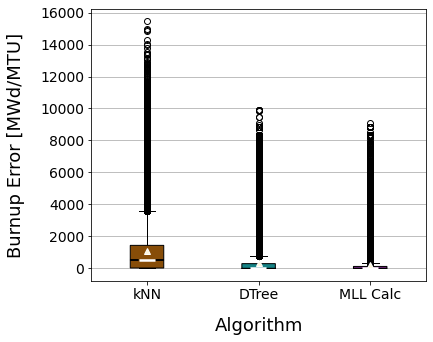

In [19]:
fig, ax, sv_fig = boxplots(pred)